<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Cours APN - Labo 1 : Groupement de clients avec _k_-moyennes

Le but de ce laboratoire est de diviser en groupes cohérents les clients d'un centre commercial, en utilisant la méthode des [_k_-moyennes implémentée dans Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Les données viennent de Kaggle: [Mall Customer Segmentation](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) (fournies avec le notebook).  Il n'y a pas d'annotation de référence des groupes, donc ce sera à vous de juger leur qualité grâce à la visualisation.  

Le travail comporte les étapes suivantes :
1. Analyse exploratoire des données.
2. Application simple des _k_-moyennes en 2D.
3. Améliorations: optimisation du nombre de groupes, 3D.

Veuillez répondre aux questions de chaque étape en écrivant d'abord les commandes nécessaires, puis en commentant le résultat si nécessaire.

Il est conseillé de créer un nouvel environnement Conda pour le cours d'APN, par exemple en utilisant la commande `conda create -n cours_apn --file requirements.txt`.  Le fichier _requirements.txt_ fourni avec le notebook liste les packages à installer. 

***
**NOM et prénom :**  Hugo HUART et Farouk FERCHICHI
***

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

## 1. Analyse exploratoire des données

Veuillez lire les données du fichier `Mail_Customers.csv` dans une *data frame* Pandas nommée `clients_df` et examinez-la.  Veuillez répondre aux questions suivantes en utilisant les commandes appropriées.

a. Combien de clients figurent dans les données ?<br>
b. Combien d'attributs y a-t-il pour chaque client ?  Quels sont leurs noms ?<br>
c. Y a-t-il des données manquantes ?<br>
d. Quel est le *5 number summary* pour chaque attribut?

In [2]:
clients_df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")
print(f"Nombre de clients: {len(clients_df)}")
print(f"""Attributs : {len(clients_df.columns)} ({", ".join(clients_df.columns)})""")
print(f"Nombre de valeurs manquantes: {clients_df.isna().sum().sum()}")
print("Résumé des attributs:")
clients_df.describe().loc[["min", "25%", "50%", "75%", "max"]]

Nombre de clients: 200
Attributs : 4 (Gender, Age, Annual Income (k$), Spending Score (1-100))
Nombre de valeurs manquantes: 0
Résumé des attributs:


,Age,Annual Income (k$),Spending Score (1-100)
min,18.00,15.0,1.00
25%,28.75,41.5,34.75
50%,36.00,61.5,50.00
75%,49.00,78.0,73.00
max,70.00,137.0,99.00


In [3]:
INCOME = "Annual Income (k$)"
SPENDING = "Spending Score (1-100)"

**a)** Il y a 200 clients

**b)** Il y a 4 attributs, dont 3 numériques (voir ci-dessus) et un discret (le genre)

**c)** Il n'y a pas de données manquantes

**d)** Voir ci-dessus

e. Combien de personnes sont des femmes, et combien des hommes ?<br>
f. Quel est le revenu annuel moyen par sexe ? Quel est le *spending score* moyen par sexe ?<br>
g. Quelles sont les valeurs extrêmes de l'âge pour les femmes ? Et pour les hommes ?<br>
h. Même question pour le revenu annuel, puis pour le *spending score*.<br>

In [4]:
print("Répartition homme/femme:")
print(clients_df["Gender"].value_counts())

print("Revenu et 'spending score' moyen par genre:")
print(clients_df.groupby("Gender").mean()[["Annual Income (k$)", "Spending Score (1-100)"]])

print("Valeurs minimales par genre:")
print(clients_df.groupby("Gender").min())

print("Valeurs maximales par genre:")
print(clients_df.groupby("Gender").max())

Répartition homme/femme:
Gender
Female    112
Male       88
Name: count, dtype: int64
Revenu et 'spending score' moyen par genre:
        Annual Income (k$)  Spending Score (1-100)
Gender                                            
Female           59.250000               51.526786
Male             62.227273               48.511364
Valeurs minimales par genre:
        Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                 
Female   18                  16                       5
Male     18                  15                       1
Valeurs maximales par genre:
        Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                 
Female   68                 126                      99
Male     70                 137                      97


**e)** Il y a 112 femmes et 88 hommes

**f)** Les revenus et 'spending score' moyens pour les hommes et les femmes sont respectivement \\$62'000 et 48 ainsi que \\$59'000 et 51

**g)** Pour les hommes et les femmes l'âge minimum est 18 ans. Les ages maximums sont respectivement 70 et 68 ans.

**h)**
Les revenus minimums sont respectivement \\$15'0000 et \\$16'000, les revenus maximums \\$137'000 et \\$126'000. Pour les 'spending score' les miminums sont 1 et 5, les maximums 97 et 99.

## 2. Groupement simple avec la méthode des k-moyennes

### 2a. Groupement avec deux attributs, en trois groupes

Pour commencer, veuillez utiliser la méthode [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) avec initialisation aléatoire, un seul essai, et en fixant le nombre de groupes à trois (3).  De plus, veuillez utiliser seulement les colonnes 'Annual Income (k$)' et 'Spending Score (1-100)' des données.

In [5]:
kmeans = KMeans(n_clusters=3, init="random", n_init=1).fit(clients_df[[INCOME, SPENDING]])
groups = kmeans.predict(clients_df[[INCOME, SPENDING]])

clients_df["Group"] = groups

Veuillez afficher les données en 2D (_annual income_ et _spending score_) en indiquant l'appartenance aux clusters par des couleurs différentes.  Veuillez utiliser des marqueurs différents pour les hommes et pour les femmes.

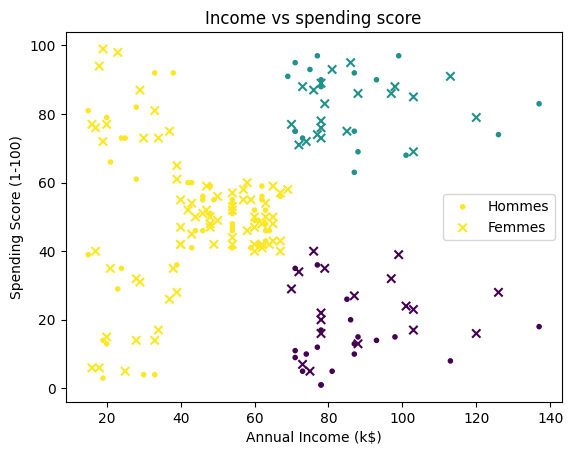

In [6]:
men = clients_df[clients_df["Gender"] == "Male"]
women = clients_df[clients_df["Gender"] == "Female"]

plt.scatter(men[INCOME], men[SPENDING], c=men["Group"], marker=".", label="Hommes")
plt.scatter(women[INCOME], women[SPENDING], c=women["Group"], marker="x", label="Femmes")

plt.title("Income vs spending score")
plt.xlabel(INCOME)
plt.ylabel(SPENDING)
plt.legend()

**Question :** comment appréciez-vous la qualité du groupement obtenu ?  Veuillez la discuter. 

**Réponse**: Le groupement n'est pas vraiment idéal. Les groupes situés les plus à droite sont assez cohérents, mais ce n'est pas le cas du groupe central qui possède 3 sous-groupes distincts (1 central et 2 périphériques sur la gauche). Le nombre de 3 groupes ne semble donc pas suffisant pour ces données.

### 2b. Choix individuel d'un nombre de groupes plus adapté

Sur la base de la question précédente, veuillez effectuer le groupement avec le nombre de groupes qui vous semble le plus adapté, autre que 3.  Veuillez effectuer 10 initialisations aléatoires.

Pour l'affichage, veuillez afficher également les centroïdes des groupes (obtenus de `KMeans`), en utilisant une étoile noire. 

In [7]:
# Vu le point précédent, un nombre de 5 semble plus approprié
kmeans = KMeans(n_clusters=5, init="random", n_init=10).fit(clients_df[[INCOME, SPENDING]])
groups = kmeans.predict(clients_df[[INCOME, SPENDING]])

clients_df["Group"] = groups
centroids = kmeans.cluster_centers_

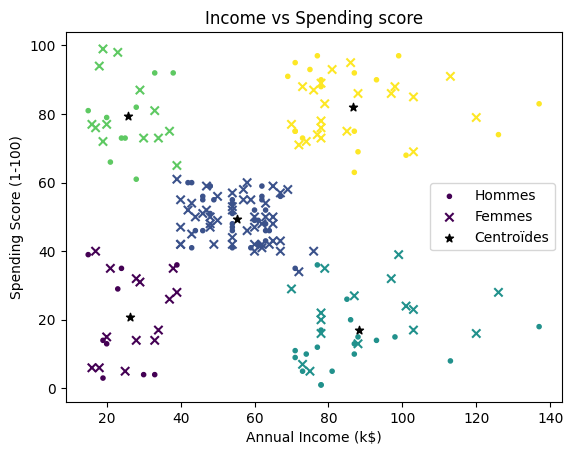

In [8]:
men = clients_df[clients_df["Gender"] == "Male"]
women = clients_df[clients_df["Gender"] == "Female"]

plt.scatter(men[INCOME], men[SPENDING], c=men["Group"], marker=".", label="Hommes")
plt.scatter(women[INCOME], women[SPENDING], c=women["Group"], marker="x", label="Femmes")
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], c="black", marker="*", label="Centroïdes")

plt.title("Income vs Spending score")
plt.xlabel(INCOME)
plt.ylabel(SPENDING)
plt.legend()

**Question :** comment appréciez-vous la qualité du nouveau groupement ?  Veuillez la discuter. 
    
Pouvez-vous décrire chaque groupe en fonction des valeurs des deux axes ?

**Réponse**: Ce groupement est bien meilleur que le précédent. Les deux "sous-groupes" périphériques mal groupés du point précédent sont désormais dans leur propre groupe ce qui est plus cohérent avec la disposition spatiale visuelle des points.

Les groupes sont disposés dans un quadrillage contraint par 4 droites:
* À ~\\$40k et ~\\$70k pour le revenu
* À ~40 et ~60 pour le score

## 3. Groupements optimisés en 3D

Dans cette section, vous allez utiliser l'initialisation k-means++ (un seul tirage), et optimiser le nombre de groupes par la méthode du coude (_elbow_).  Puis, vous allez ajouter la dimension de l'âge et afficher les groupes en 3D.

### 3a. Méthode du coude et initialisation k-means++

Dans tout ce qui suit, vous allez initialiser les centroïdes avec k-means++ (paramètre `init`) et exécuter 5 fois l'algorithme des k-moyennes (paramètre `n_init`).

Veuillez afficher les valeurs du coefficient WSS (Within-cluster Sum of Squares) ou **inertie** pour un nombre de groupes variant de 1 à 9.  Travaillez pour l'instant en deux dimensions, comme avant.

WSS pour 1 groupes: 269981.28
WSS pour 2 groupes: 183653.33
WSS pour 3 groupes: 106348.37
WSS pour 4 groupes: 73679.79
WSS pour 5 groupes: 44448.46
WSS pour 6 groupes: 37265.87
WSS pour 7 groupes: 30241.34
WSS pour 8 groupes: 25028.02
WSS pour 9 groupes: 22813.91


Text(0.5, 1.0, 'Observation du coude')

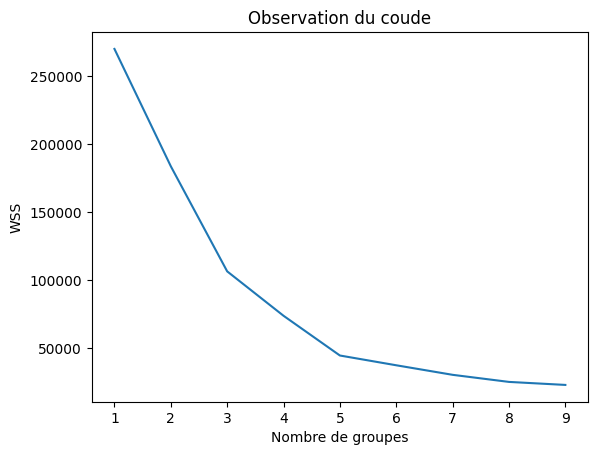

In [9]:
n_groups = list(range(1, 10))
wss = list()

for n in n_groups:
    kmeans = KMeans(n_clusters=n, init="k-means++", n_init=5).fit(clients_df[[INCOME, SPENDING]])
    inertia = kmeans.inertia_
    wss.append(inertia)
    
    print(f"WSS pour {n} groupes: {kmeans.inertia_:.2f}")

plt.plot(n_groups, wss)
plt.xlabel("Nombre de groupes")
plt.ylabel("WSS")
plt.title("Observation du coude")

**Question :** quel est le nombre de groupes qui est optimal d'après cette méthode ?

**Réponse**: On constate que le coude est le plus marqué pour une valeur de 5 groupes

Veuillez effectuer le groupement avec le nombre de groupes optimal et les paramètres indiqués pour cette section.  

Veuillez **afficher le résultat** avec le même format que dans la figure précédente.

In [10]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=5).fit(clients_df[[INCOME, SPENDING]])
groups = kmeans.predict(clients_df[[INCOME, SPENDING]])

clients_df["Group"] = groups
centroids = kmeans.cluster_centers_

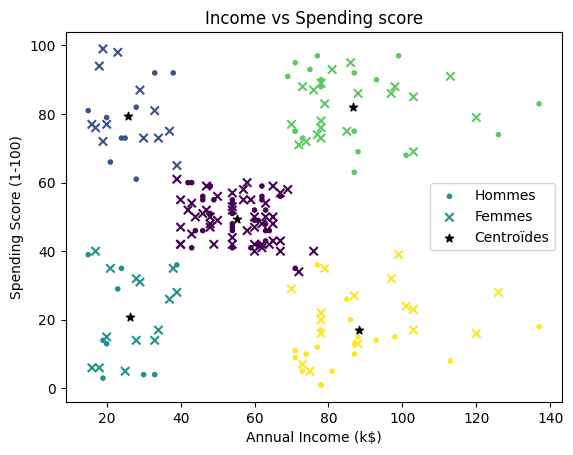

In [11]:
men = clients_df[clients_df["Gender"] == "Male"]
women = clients_df[clients_df["Gender"] == "Female"]

plt.scatter(men[INCOME], men[SPENDING], c=men["Group"], marker=".", label="Hommes")
plt.scatter(women[INCOME], women[SPENDING], c=women["Group"], marker="x", label="Femmes")
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], c="black", marker="*", label="Centroïdes")

plt.title("Income vs Spending score")
plt.xlabel(INCOME)
plt.ylabel(SPENDING)
plt.legend()

**Question :** comment se compare ce groupement à celui obtenu au 2b ?

**Réponse** : Il est strictement similaire au groupement obtenu précédemment.

Veuillez calculer le nombre de femmes et d'hommes, respectivement, dans chaque groupe.  Dans quels groupes y a-t-il plus d'hommes que de femmes, et quelles sont les propriétés de ces groupes (revenu, score) ?

In [12]:
print("Répartition homme/femme dans les groupes:")
print(clients_df.groupby("Group")["Gender"].value_counts())

print("\nMédiane des revenus:")
print(clients_df.groupby("Group")[INCOME].median())

print("\nMédiane des scores:")
print(clients_df.groupby("Group")[SPENDING].median())

Répartition homme/femme dans les groupes:
Group  Gender
0      Female    48
       Male      33
1      Female    13
       Male       9
2      Female    14
       Male       9
3      Female    21
       Male      18
4      Male      19
       Female    16
Name: count, dtype: int64

Médiane des revenus:
Group
0    54.0
1    24.5
2    25.0
3    79.0
4    85.0
Name: Annual Income (k$), dtype: float64

Médiane des scores:
Group
0    50.0
1    77.0
2    17.0
3    83.0
4    16.0
Name: Spending Score (1-100), dtype: float64


**Réponse**: Le groupe 1 (celui en bas à droite dans le graphique) est le seul comportant plus d'hommes que de femmes. Il possède la plus grande médiane pour le revenu et la plus faible pour les scores.

### 3b. Groupement utilisant 3 attributs

Veuillez utiliser à partir de maintenant aussi l'attribut de l'âge.  Veuillez déterminer le nombre optimal de groupes par la méthode du coude, et garder l'initialisation k-means++ avec 5 exécutions.  Dans cette section, on vous demande aussi d'afficher les groupes en 3D.

WSS pour 1 groupes: 308812.78
WSS pour 2 groupes: 212840.17
WSS pour 3 groupes: 143342.75
WSS pour 4 groupes: 104366.15
WSS pour 5 groupes: 75378.76
WSS pour 6 groupes: 58300.44
WSS pour 7 groupes: 51525.77
WSS pour 8 groupes: 45265.14
WSS pour 9 groupes: 42117.35


Text(0.5, 1.0, 'Observation du coude')

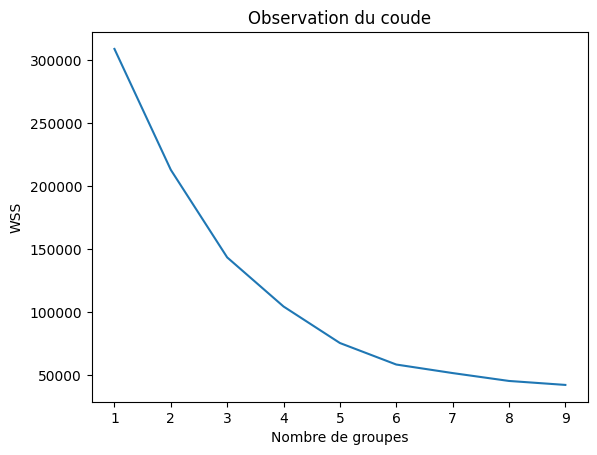

In [13]:
n_groups = list(range(1, 10))
wss = list()

for n in n_groups:
    kmeans = KMeans(n_clusters=n, init="k-means++", n_init=5).fit(clients_df[[INCOME, SPENDING, "Age"]])
    inertia = kmeans.inertia_
    wss.append(inertia)
    
    print(f"WSS pour {n} groupes: {kmeans.inertia_:.2f}")

plt.plot(n_groups, wss)
plt.xlabel("Nombre de groupes")
plt.ylabel("WSS")
plt.title("Observation du coude")

In [14]:
# Une valeur de 6 semble adéquate vu le coude du graphique précédent
kmeans = KMeans(n_clusters=6, init="k-means++", n_init=5).fit(clients_df[[INCOME, SPENDING, "Age"]])
groups = kmeans.predict(clients_df[[INCOME, SPENDING, "Age"]])

clients_df["Group"] = groups
centroids = kmeans.cluster_centers_

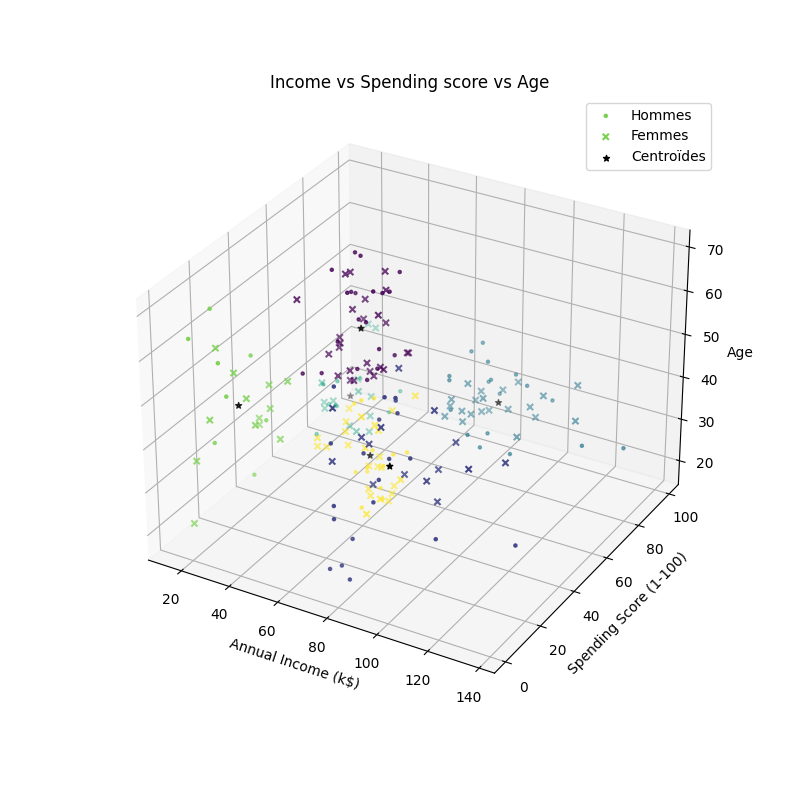

In [15]:
%matplotlib widget

men = clients_df[clients_df["Gender"] == "Male"]
women = clients_df[clients_df["Gender"] == "Female"]

fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")

ax.scatter(men[INCOME], men[SPENDING], men["Age"], c=men["Group"], marker=".", label="Hommes")
ax.scatter(women[INCOME], women[SPENDING], women["Age"], c=women["Group"], marker="x", label="Femmes")
ax.scatter(xs=centroids[:, 0], ys=centroids[:, 1], zs=centroids[:, 2], c="black", marker="*", label="Centroïdes")

ax.set_xlabel(INCOME)
ax.set_ylabel(SPENDING)
ax.set_zlabel("Age")

plt.title("Income vs Spending score vs Age")
plt.legend()

**Question :** comment se compare ce groupement à celui obtenu au 2b ?

**Réponse**: À l'aide de la nouvelle composante (l'âge), on constate que le groupe central que l'on retrouvait dans les graphiques en 2D peut être séparé verticalement en deux nouveaux groupes distincts par cette dernière.

**Question :** serait-il difficile d'ajouter le paramètre 'Gender' (avec les valeurs 'Male' et 'Female') comme 4e attribut pour effectuer le groupement ?  Veuillez discuter la pertinence de cette idée.

**Réponse**: Le paramètre du genre constitue déjà un groupe non-arbitraire vue sa nature discrète. Il serait difficile d'attribuer une valeur numérique pertinente aux valeurs discrètes du paramètre, à moins peut-être de normaliser toute les autres valeurs et d'attribuer une valeur de 0 ou 1. On pousserait cependant l'algorithme à "retrouver" ces deux groupes déjà existant ce qui n'a pas vraiment beaucoup d'intêret en soit.

***
**Fin du Labo 1.**  Veuillez nettoyer ce notebook en gardant seulement les réponses et résultats désirés, l'enregistrer en remplaçant 'student' par votre nom, et le soumettre sur Cyberlearn.